In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#soil Prediction
import numpy as np
import pandas as pd

soil_train = pd.read_csv('/content/drive/MyDrive/SoilDataSet/soil_train.csv')
soil_test = pd.read_csv('/content/drive/MyDrive/SoilDataSet/Soil_test.csv')
print(soil_train.head())
print(soil_train.shape)
print(soil_train.describe()) #to know insight about the data
print(soil_train.info())

    Soil_ID Cultivated Porousity Dependents Structre Water_available  Texture  \
0  LP001002        yes        No          0     soft              No     5849   
1  LP001003        yes       Yes          1     soft              No     4583   
2  LP001005        yes       Yes          0     soft             Yes     3000   
3  LP001006        yes       Yes          0     hard              No     2583   
4  LP001008        yes        No          0     soft              No     6000   

   Colour  Depth  Stone content  Growth_History Location Soil_Status  
0     0.0    NaN          360.0             1.0    Urban           Y  
1  1508.0  128.0          360.0             1.0    Rural           N  
2     0.0   66.0          360.0             1.0    Urban           Y  
3  2358.0  120.0          360.0             1.0    Urban           Y  
4     0.0  141.0          360.0             1.0    Urban           Y  
(491, 13)
            Texture        Colour       Depth  Stone content  Growth_History


In [3]:
soil_train.columns

Index(['Soil_ID', 'Cultivated', 'Porousity', 'Dependents', 'Structre',
       'Water_available', 'Texture', 'Colour', 'Depth', 'Stone content',
       'Growth_History', 'Location', 'Soil_Status'],
      dtype='object')

In [4]:
#EDA (Exploratory Data Analysis)
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())
explore_object_type(soil_train, 'Cultivated')

yes    393
no      89
Name: Cultivated, dtype: int64


In [5]:
soil_train_columns=soil_train.columns
for col in soil_train_columns:
    explore_object_type(soil_train,col)

LP001002    1
LP002112    1
LP002106    1
LP002103    1
LP002101    1
           ..
LP001552    1
LP001546    1
LP001543    1
LP001541    1
LP002560    1
Name: Soil_ID, Length: 491, dtype: int64
yes    393
no      89
Name: Cultivated, dtype: int64
Yes    316
No     172
Name: Porousity, dtype: int64
0     282
2      79
1      78
3+     40
Name: Dependents, dtype: int64
soft    388
hard    103
Name: Structre, dtype: int64
No     400
Yes     64
Name: Water_available, dtype: int64
Semiurban    185
Urban        169
Rural        137
Name: Location, dtype: int64
Y    338
N    153
Name: Soil_Status, dtype: int64


In [6]:
soil_train.isna().sum()#missing value count per column

Soil_ID             0
Cultivated          9
Porousity           3
Dependents         12
Structre            0
Water_available    27
Texture             0
Colour              0
Depth              18
Stone content      14
Growth_History     39
Location            0
Soil_Status         0
dtype: int64

In [7]:
soil_train['Growth_History'].fillna(soil_train['Growth_History'].mean(), inplace=True)
soil_test['Growth_History'].fillna(soil_test['Growth_History'].mean(), inplace=True)

soil_train['Depth'].fillna(soil_train['Depth'].mean(), inplace=True)
soil_test['Depth'].fillna(soil_test['Depth'].mean(), inplace=True)

soil_train['Cultivated'].fillna(soil_train['Cultivated'].mode()[0], inplace=True)
soil_test['Cultivated'].fillna(soil_test['Cultivated'].mode()[0], inplace=True)

soil_train['Dependents'].fillna(soil_train['Dependents'].mode()[0], inplace=True)
soil_test['Dependents'].fillna(soil_test['Dependents'].mode()[0], inplace=True)

soil_train['Porousity'].fillna(soil_train['Porousity'].mode()[0], inplace=True)
soil_test['Porousity'].fillna(soil_test['Porousity'].mode()[0], inplace=True)



In [8]:
soil_train.Soil_Status = soil_train.Soil_Status.replace({"Y": 1, "N" : 0})


soil_train.Cultivated = soil_train.Cultivated.replace({"yes": 1, "no" : 0})
soil_test.Cultivated = soil_test.Cultivated.replace({"yes": 1, "no" : 0})

soil_train.Porousity = soil_train.Porousity.replace({"Yes": 1, "No" : 0})
soil_test.Porosuity = soil_test.Porousity.replace({"Yes": 1, "No" : 0})

soil_train.Water_available = soil_train.Water_available.replace({"Yes": 1, "No" : 0})
soil_test.Water_available = soil_test.Water_available.replace({"Yes": 1, "No" : 0})

<ipython-input-8-5da79a317a2c>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  soil_test.Porosuity = soil_test.Porousity.replace({"Yes": 1, "No" : 0})


In [9]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Location','Structre', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    soil_train[col] = le.fit_transform(soil_train[col])
    soil_test[col] = le.fit_transform(soil_test[col])
soil_train

,Soil_ID,Cultivated,Porousity,Dependents,Structre,Water_available,Texture,Colour,Depth,Stone content,Growth_History,Location,Soil_Status
0,LP001002,1,0,0,1,0.0,5849,0.0,144.082452,360.0,1.000000,2,1
1,LP001003,1,1,1,1,0.0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,LP001005,1,1,0,1,1.0,3000,0.0,66.000000,360.0,1.000000,2,1
3,LP001006,1,1,0,0,0.0,2583,2358.0,120.000000,360.0,1.000000,2,1
4,LP001008,1,0,0,1,0.0,6000,0.0,141.000000,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP002545,1,0,2,1,0.0,3547,0.0,80.000000,360.0,0.000000,0,0
487,LP002547,1,1,1,1,0.0,18333,0.0,500.000000,360.0,1.000000,2,0
488,LP002555,1,1,2,1,1.0,4583,2083.0,160.000000,360.0,1.000000,1,1
489,LP002556,1,0,0,1,0.0,2435,0.0,75.000000,360.0,1.000000,2,0


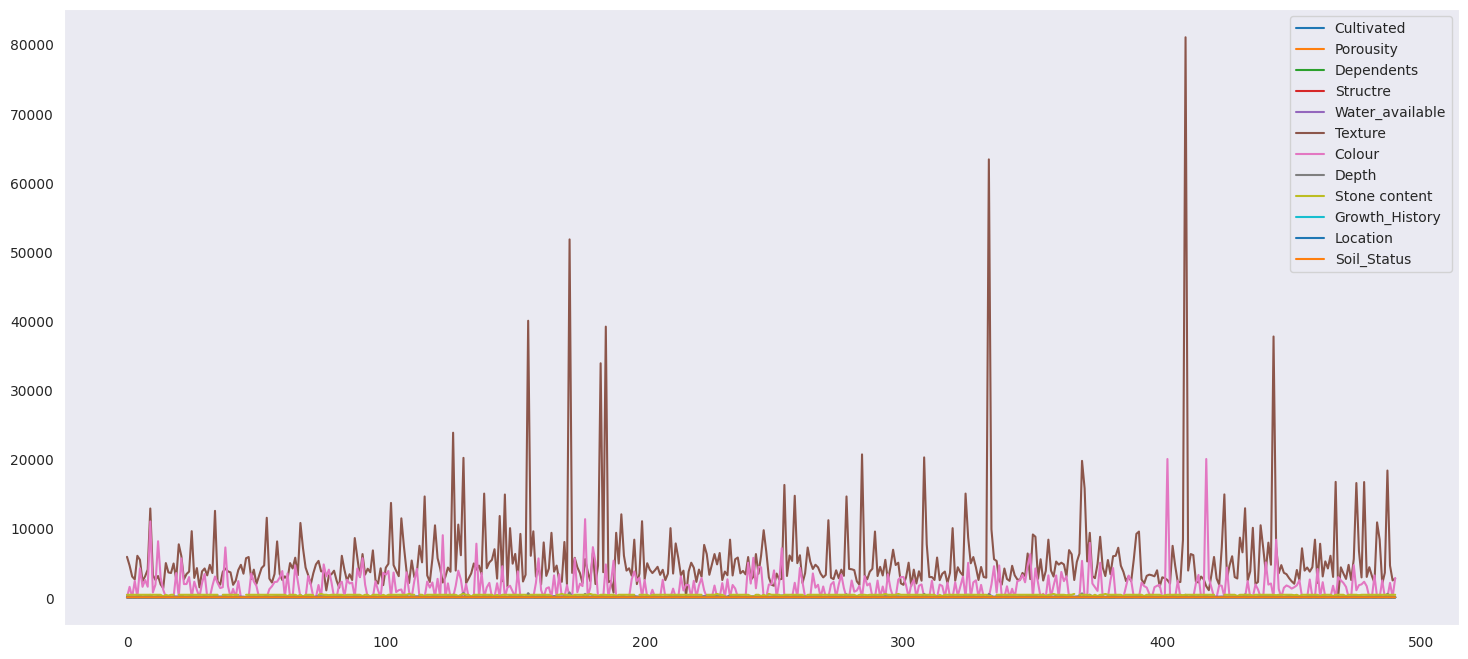

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')
soil_train.plot(figsize=(18, 8))

plt.show()

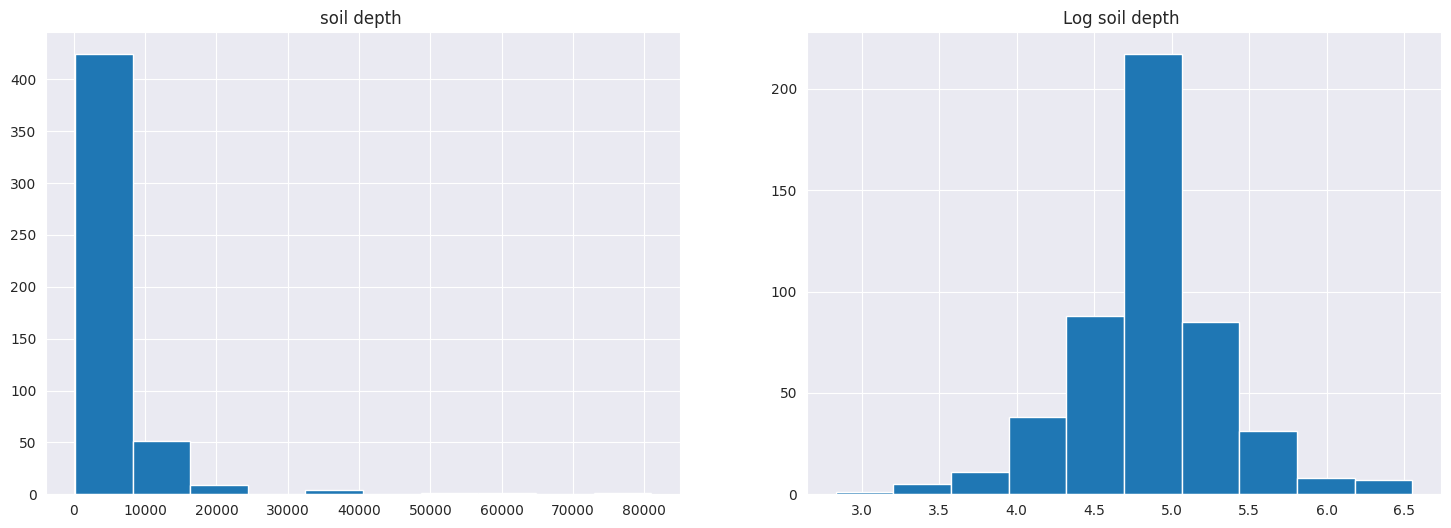

In [11]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


soil_train['Texture'].hist(bins=10)
plt.title("soil depth ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(soil_train['Depth']))
plt.title("Log soil depth ")

plt.show()

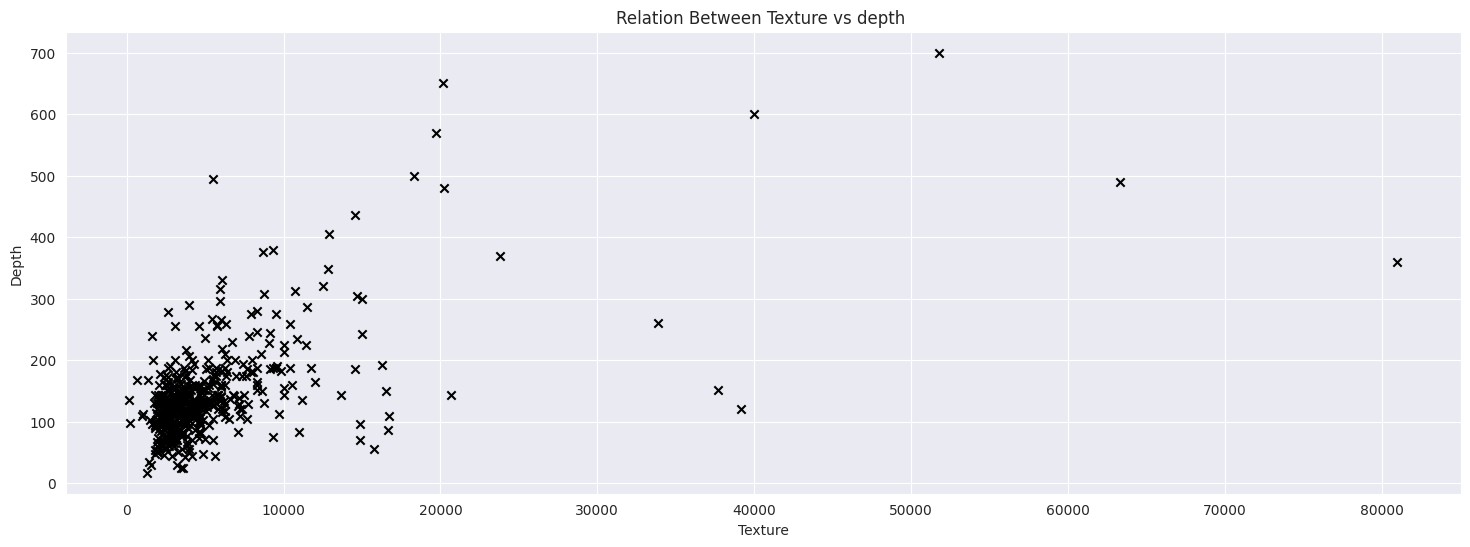

In [12]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Texture vs depth ")

plt.grid()
plt.scatter(soil_train['Texture'] , soil_train['Depth'], c='k', marker='x')
plt.xlabel("Texture")
plt.ylabel("Depth")
plt.show()

<ipython-input-13-8be70e343931>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(soil_train.corr(), cmap='coolwarm', annot=True,fmt='.1f', linewidths=.1)


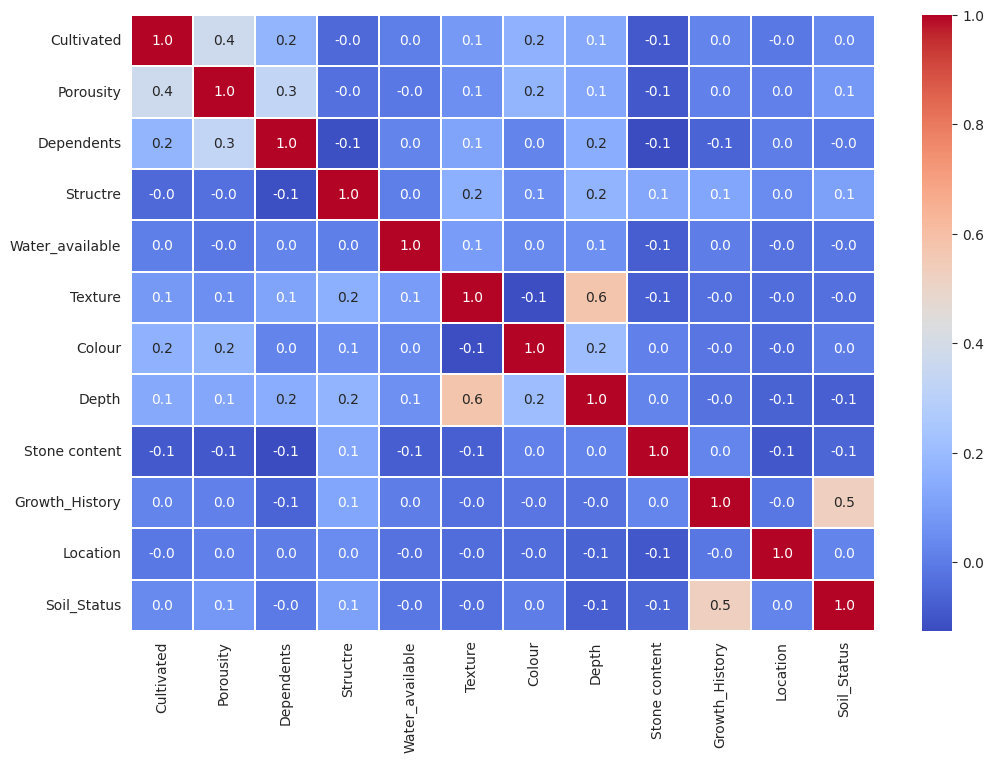

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(soil_train.corr(), cmap='coolwarm', annot=True,fmt='.1f', linewidths=.1)
plt.show()

In [14]:
soil_train.isna().sum()

Soil_ID             0
Cultivated          0
Porousity           0
Dependents          0
Structre            0
Water_available    27
Texture             0
Colour              0
Depth               0
Stone content      14
Growth_History      0
Location            0
Soil_Status         0
dtype: int64

In [15]:

# import ml model from sklearn package

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
#training the model
train_features = ['Texture', 'Depth', 'Growth_History']

x_train = soil_train[train_features].values
y_train = soil_train['Soil_Status'].values

x_test = soil_test[train_features].values
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [16]:
# Predict the model for testing data

predicted = logistic_model.predict(x_test)

In [17]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)
# Accuray Score on train dataset
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))
# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Coefficient of model : [[ 1.49239625e-05 -2.72305049e-03  3.16675215e+00]]
Intercept of model [-1.53149065]
accuracy_score overall : 0.8044806517311609
accuracy_score percent : 80.45
Target on test data [1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0]
